In [119]:
import utils
import numpy as np
import pandas as pd
import featuretools as ft
print('Featuretools version {}'.format(ft.__version__))

import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('data/compas_extended.csv')
data.head(3)

# remove "faircause_preds" column and "decile_score" column
data = data.drop(columns=['decile_score','Unnamed: 0'])

# print the unique values for each column
for column in data.columns:
    print(column, data[column].unique())

Featuretools version 1.4.0
Index(['sex', 'age', 'race', 'juv_fel_count', 'juv_misd_count',
       'juv_other_count', 'priors_count', 'c_case_number', 'c_charge_degree',
       'two_year_recid', 'days_in_jail'],
      dtype='object')
sex [1 0]
age [69 34 24 44 41 43 39 21 27 23 37 47 31 25 64 32 36 26 33 30 55 49 29 51
 35 28 48 63 53 38 22 62 56 45 40 50 20 66 54 19 59 42 52 61 46 58 78 57
 70 60 68 65 71 83 67 75 72 74 96 73 18 80 77 76 79]
race [0 1]
juv_fel_count [ 0  2  1  8  4  3  9 20  6  5 10]
juv_misd_count [ 0  1  6 12  2  4  3  8  5 13]
juv_other_count [0 1 2 3 4 9 5 6 7]
priors_count [ 0  4 14  3  1  7  6  5 13  8  9 21  2 20 15 10 28 19 11 22 23 25 24 36
 12 16 33 17 18 30 27 38 26 37 29 35 31]
c_case_number ['13011352CF10A' '13001275CF10A' '13005330CF10A' ... '14000581CF10A'
 '14003308CF10A' '14008895CF10A']
c_charge_degree [0 1]
two_year_recid [0 1]
days_in_jail [  1  10   6   3   4  14   0   2  17  38  44  12  11  33  80   7  51   8
 136  23  13  36 124  19  30 242   5  

In [120]:
# List the logical types for each column
from woodwork.logical_types import BooleanNullable, Categorical, Ordinal

logical_types = {'sex': BooleanNullable,
                    'days_in_jail': Ordinal(order=list(range(0, 1000))),
                    'age': Ordinal(order=list(range(15, 100))),
                    'race': BooleanNullable,
                    'juv_fel_count': Ordinal(order=list(range(0, 50))),
                    'juv_misd_count': Ordinal(order=list(range(0, 50))),
                    'juv_other_count': Ordinal(order=list(range(0, 50))),
                    'priors_count': Ordinal(order=list(range(0, 100))),
                    'c_charge_degree': BooleanNullable,
                    'two_year_recid': BooleanNullable}




In [121]:
# Add a dataframe named 'appointments' which stores dataset metadata with the dataframe
es = ft.EntitySet('recidivism_data')

es = es.add_dataframe(dataframe_name="recidivism_data",
                      dataframe=data,
                      index='c_case_number',
                      logical_types=logical_types)
es['recidivism_data'].ww

,Physical Type,Logical Type,Semantic Tag(s)
Column,,,
sex,boolean,BooleanNullable,[]
age,category,Ordinal,['category']
race,boolean,BooleanNullable,[]
juv_fel_count,category,Ordinal,['category']
juv_misd_count,category,Ordinal,['category']
juv_other_count,category,Ordinal,['category']
priors_count,category,Ordinal,['category']
c_case_number,string,Unknown,['index']
c_charge_degree,boolean,BooleanNullable,[]


In [122]:
# Make race, ages and genders (these are not in the BN)
# es.normalize_dataframe('recidivism_data', 'races', 'race', make_time_index=False)
es.normalize_dataframe('recidivism_data', 'ages', 'age', make_time_index=False)
es.normalize_dataframe('recidivism_data', 'genders', 'sex', make_time_index=False)

# Suppose only features in W are allowed
es.normalize_dataframe('recidivism_data', 'days_in_jail', 'days_in_jail', make_time_index=False)
es.normalize_dataframe('recidivism_data', 'juv_fel_count', 'juv_fel_count', make_time_index=False)
es.normalize_dataframe('recidivism_data', 'juv_misd_count', 'juv_misd_count', make_time_index=False)
es.normalize_dataframe('recidivism_data', 'juv_other_count', 'juv_other_count', make_time_index=False)
es.normalize_dataframe('recidivism_data', 'priors_count', 'priors_count', make_time_index=False)
es.normalize_dataframe('recidivism_data', 'c_charge_degree', 'c_charge_degree', make_time_index=False)
                       
# Idea; try to combine race or gender with the other columns
# es.normalize_dataframe('recidivism_data', 'c_charge_degree', 'c_charge_degree',
#                        additional_columns=['days_in_jail',
#                                            'juv_fel_count',
#                                            'juv_misd_count',
#                                            'juv_other_count',
#                                            'priors_count'],)


Entityset: recidivism_data
  DataFrames:
    recidivism_data [Rows: 6907, Columns: 11]
    ages [Rows: 65, Columns: 1]
    genders [Rows: 2, Columns: 1]
    days_in_jail [Rows: 280, Columns: 1]
    juv_fel_count [Rows: 11, Columns: 1]
    juv_misd_count [Rows: 10, Columns: 1]
    juv_other_count [Rows: 9, Columns: 1]
    priors_count [Rows: 37, Columns: 1]
    c_charge_degree [Rows: 2, Columns: 1]
  Relationships:
    recidivism_data.age -> ages.age
    recidivism_data.sex -> genders.sex
    recidivism_data.days_in_jail -> days_in_jail.days_in_jail
    recidivism_data.juv_fel_count -> juv_fel_count.juv_fel_count
    recidivism_data.juv_misd_count -> juv_misd_count.juv_misd_count
    recidivism_data.juv_other_count -> juv_other_count.juv_other_count
    recidivism_data.priors_count -> priors_count.priors_count
    recidivism_data.c_charge_degree -> c_charge_degree.c_charge_degree

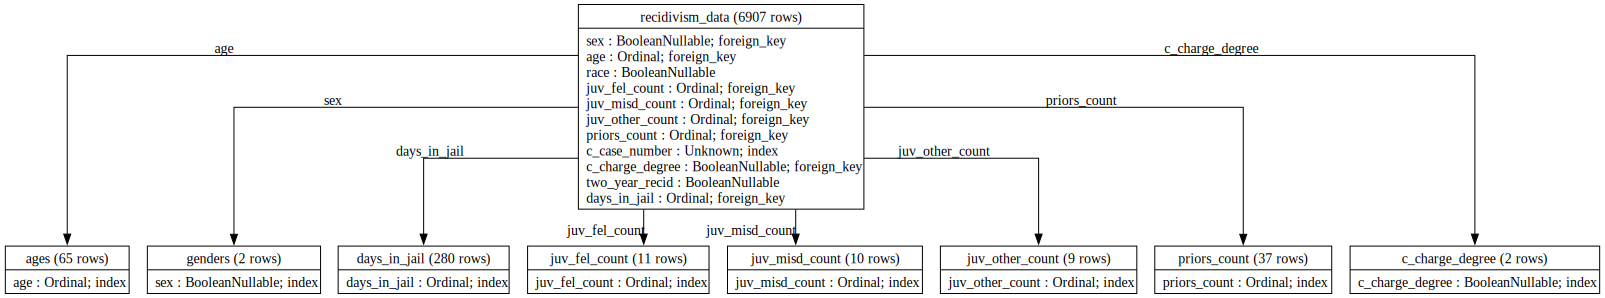

In [123]:
es.plot()

In [124]:
# Generate features using the constructed entityset
fm, features = ft.dfs(entityset=es,
                      target_dataframe_name='recidivism_data',
                        agg_primitives=['count', 'percent_true', 'sum', 'mean', 'num_unique', 'max', 'skew', 'min', 'std', 'median'],
                        max_depth=3,
                        verbose=True)
                        

# ft.dfs()

Built 90 features
Elapsed: 00:01 | Progress: 100%|██████████


In [125]:
# print the features
print(features)

# print fm dataframe
fm.head()

[<Feature: sex>, <Feature: age>, <Feature: race>, <Feature: juv_fel_count>, <Feature: juv_misd_count>, <Feature: juv_other_count>, <Feature: priors_count>, <Feature: c_charge_degree>, <Feature: two_year_recid>, <Feature: days_in_jail>, <Feature: ages.COUNT(recidivism_data)>, <Feature: ages.NUM_UNIQUE(recidivism_data.days_in_jail)>, <Feature: ages.NUM_UNIQUE(recidivism_data.juv_fel_count)>, <Feature: ages.NUM_UNIQUE(recidivism_data.juv_misd_count)>, <Feature: ages.NUM_UNIQUE(recidivism_data.juv_other_count)>, <Feature: ages.NUM_UNIQUE(recidivism_data.priors_count)>, <Feature: ages.PERCENT_TRUE(recidivism_data.c_charge_degree)>, <Feature: ages.PERCENT_TRUE(recidivism_data.race)>, <Feature: ages.PERCENT_TRUE(recidivism_data.sex)>, <Feature: ages.PERCENT_TRUE(recidivism_data.two_year_recid)>, <Feature: genders.COUNT(recidivism_data)>, <Feature: genders.NUM_UNIQUE(recidivism_data.age)>, <Feature: genders.NUM_UNIQUE(recidivism_data.days_in_jail)>, <Feature: genders.NUM_UNIQUE(recidivism_data

,sex,age,race,juv_fel_count,juv_misd_count,juv_other_count,priors_count,c_charge_degree,two_year_recid,days_in_jail,...,c_charge_degree.COUNT(recidivism_data),c_charge_degree.NUM_UNIQUE(recidivism_data.age),c_charge_degree.NUM_UNIQUE(recidivism_data.days_in_jail),c_charge_degree.NUM_UNIQUE(recidivism_data.juv_fel_count),c_charge_degree.NUM_UNIQUE(recidivism_data.juv_misd_count),c_charge_degree.NUM_UNIQUE(recidivism_data.juv_other_count),c_charge_degree.NUM_UNIQUE(recidivism_data.priors_count),c_charge_degree.PERCENT_TRUE(recidivism_data.race),c_charge_degree.PERCENT_TRUE(recidivism_data.sex),c_charge_degree.PERCENT_TRUE(recidivism_data.two_year_recid)
c_case_number,,,,,,,,,,,,,,,,,,,,,
13011352CF10A,True,69,False,0,0,0,0,False,False,1,...,4506,59,265,11,10,9,36,0.320240,0.823569,0.501997
13001275CF10A,True,34,False,0,0,0,0,False,True,10,...,4506,59,265,11,10,9,36,0.320240,0.823569,0.501997
13005330CF10A,True,24,False,0,0,1,4,False,True,1,...,4506,59,265,11,10,9,36,0.320240,0.823569,0.501997
13022355MM10A,True,44,False,0,0,0,0,True,False,1,...,2401,61,120,6,7,7,30,0.389421,0.778009,0.389005
14002304CF10A,True,41,True,0,0,0,14,False,True,6,...,4506,59,265,11,10,9,36,0.320240,0.823569,0.501997


In [126]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

X = fm.copy()
print(X.columns)
label = X.pop('two_year_recid')
# drop columns that contain two_year_recid in the name 
X = X.loc[:,~X.columns.str.contains('two_year_recid')]
# drop columns that contain race in the name
X = X.loc[:,~X.columns.str.contains('race')]
# drop columns that contain sex in the name
X = X.loc[:,~X.columns.str.contains('sex')]
# drop columns that contain age in the name
X = X.loc[:,~X.columns.str.contains('age')]

# Change nullable dtypes to types that can be used by EvalML
for col in X.columns:
    if X[col].dtype == 'boolean':
        X[col] = X[col].astype('bool')
    elif X[col].dtype == 'Int64':
        X[col] = X[col].astype('float')

X_train, X_test, y_train, y_test = train_test_split(X, label, test_size=0.30, shuffle=False)
clf = RandomForestClassifier(n_estimators=150)
clf.fit(X_train, y_train)
probs = clf.predict_proba(X_test)
print('AUC score of {:.3f}'.format(roc_auc_score(y_test, probs[:,1])))

Index(['sex', 'age', 'race', 'juv_fel_count', 'juv_misd_count',
       'juv_other_count', 'priors_count', 'c_charge_degree', 'two_year_recid',
       'days_in_jail', 'ages.COUNT(recidivism_data)',
       'ages.NUM_UNIQUE(recidivism_data.days_in_jail)',
       'ages.NUM_UNIQUE(recidivism_data.juv_fel_count)',
       'ages.NUM_UNIQUE(recidivism_data.juv_misd_count)',
       'ages.NUM_UNIQUE(recidivism_data.juv_other_count)',
       'ages.NUM_UNIQUE(recidivism_data.priors_count)',
       'ages.PERCENT_TRUE(recidivism_data.c_charge_degree)',
       'ages.PERCENT_TRUE(recidivism_data.race)',
       'ages.PERCENT_TRUE(recidivism_data.sex)',
       'ages.PERCENT_TRUE(recidivism_data.two_year_recid)',
       'genders.COUNT(recidivism_data)',
       'genders.NUM_UNIQUE(recidivism_data.age)',
       'genders.NUM_UNIQUE(recidivism_data.days_in_jail)',
       'genders.NUM_UNIQUE(recidivism_data.juv_fel_count)',
       'genders.NUM_UNIQUE(recidivism_data.juv_misd_count)',
       'genders.NUM_UNIQUE

In [127]:
feature_imps = [(imp, X.columns[i]) for i, imp in enumerate(clf.feature_importances_)]
feature_imps.sort()
feature_imps.reverse()
print('Random Forest Feature Importances:')
for i, f in enumerate(feature_imps[0:8]):
    print('{}: {} [{:.3f}]'.format(i + 1, f[1], f[0]/feature_imps[0][0]))

Random Forest Feature Importances:
1: days_in_jail [1.000]
2: days_in_jail.COUNT(recidivism_data) [0.757]
3: days_in_jail.PERCENT_TRUE(recidivism_data.c_charge_degree) [0.669]
4: days_in_jail.NUM_UNIQUE(recidivism_data.priors_count) [0.656]
5: priors_count [0.556]
6: priors_count.NUM_UNIQUE(recidivism_data.days_in_jail) [0.529]
7: priors_count.COUNT(recidivism_data) [0.507]
8: priors_count.PERCENT_TRUE(recidivism_data.c_charge_degree) [0.481]


In [128]:
# take the 10 most important features, which were not in the original dataset
new_features = [f[1] for f in feature_imps[0:10] if f[1] not in data.columns]
print(new_features)

['days_in_jail.COUNT(recidivism_data)', 'days_in_jail.PERCENT_TRUE(recidivism_data.c_charge_degree)', 'days_in_jail.NUM_UNIQUE(recidivism_data.priors_count)', 'priors_count.NUM_UNIQUE(recidivism_data.days_in_jail)', 'priors_count.COUNT(recidivism_data)', 'priors_count.PERCENT_TRUE(recidivism_data.c_charge_degree)', 'days_in_jail.NUM_UNIQUE(recidivism_data.juv_fel_count)', 'days_in_jail.NUM_UNIQUE(recidivism_data.juv_other_count)']


In [129]:
# save the 10 best new features, and the old features
new_data = data.copy()
for f in new_features:
    new_data[f] = X[f]
new_data.to_csv('data/compas_extended_with_features(W+).csv', index=False)


We are now going to perform conditional independence tests on the variables

In [130]:
# use conditional independence tests to determine the BN structure
from pgmpy.models import BayesianModel
from pgmpy.independencies import IndependenceAssertion

test_feature = new_features[1]
print('Testing feature:', test_feature)
# create a Bayesian model with two_year_recid as the target
model = BayesianModel([(test_feature, 'two_year_recid'), ('days_in_jail', 'two_year_recid'), ('days_in_jail', test_feature)])
# test if the test_feature is independent of two_year_recid given the other features
ind_test = model.local_independencies(test_feature)


Testing feature: days_in_jail.PERCENT_TRUE(recidivism_data.c_charge_degree)


In [131]:
ind_test

In [132]:
import numpy as np
from hyppo.independence import Hsic

hsic = Hsic()
X = new_data[test_feature].values
print('type:', type(X))
Y = new_data['two_year_recid'].values
# convert to ndarray
Y = np.array(Y)
print('type:', type(Y))
statistic, p_value = hsic.test(X, Y)

print(f'HSIC Statistic: {statistic}, P-value: {p_value}')

type: <class 'numpy.ndarray'>
type: <class 'numpy.ndarray'>
HSIC Statistic: 0.017036938189061986, P-value: 1.234287100271318e-27


In [133]:
print("test feature:", test_feature)

test feature: days_in_jail.PERCENT_TRUE(recidivism_data.c_charge_degree)


In [134]:
new_data.columns

Index(['sex', 'age', 'race', 'juv_fel_count', 'juv_misd_count',
       'juv_other_count', 'priors_count', 'c_case_number', 'c_charge_degree',
       'two_year_recid', 'days_in_jail', 'days_in_jail.COUNT(recidivism_data)',
       'days_in_jail.PERCENT_TRUE(recidivism_data.c_charge_degree)',
       'days_in_jail.NUM_UNIQUE(recidivism_data.priors_count)',
       'priors_count.NUM_UNIQUE(recidivism_data.days_in_jail)',
       'priors_count.COUNT(recidivism_data)',
       'priors_count.PERCENT_TRUE(recidivism_data.c_charge_degree)',
       'days_in_jail.NUM_UNIQUE(recidivism_data.juv_fel_count)',
       'days_in_jail.NUM_UNIQUE(recidivism_data.juv_other_count)'],
      dtype='object')

In [138]:
from causallearn.utils.cit import CIT

# Convert boolean columns to integer (0 and 1)
bool_cols = ['two_year_recid', 'c_charge_degree']  # Update this list with the names of your boolean columns
for col in bool_cols:
    new_data[col] = new_data[col].astype(int)

# use the CIT class to test the conditional independence of the new features
test = new_data.copy()
# drop columns that contain two_year_recid in the name
test = test[['two_year_recid', 'c_charge_degree', 'days_in_jail', test_feature]]

# convert to numpy array
test_array = test.to_numpy()


# Ensure all data is of numeric type before creating CIT instance
print('Data types of the numpy array elements:', test_array.dtype)

cit = CIT(test_array, "kci")

# Define the indices for X, Y, and the conditioning set S
X = test.columns.get_loc(test_feature)  # get column index for 'test_feature'
Y = test.columns.get_loc('two_year_recid')  # get column index for 'two_year_recid'
S = [test.columns.get_loc('days_in_jail'), test.columns.get_loc('c_charge_degree')]  # get indices for conditioning set

pvalue = cit(X, Y, S)
print("P-value:", pvalue)


KeyError: "['days_in_jail.PERCENT_TRUE(recidivism_data.c_charge_degree)'] not in index"

In [137]:

print("P-value:", pvalue)


P-value: 0.21322978368806778


In [136]:
# import numpy as np
# import pandas as pd
# from causallearn.utils.cit import CIT

# # Sample data creation (replace this with your actual data loading)
# data = {
#     'two_year_recid': [True, False, True, False],
#     'c_charge_degree': [True, False, False, True],
#     'days_in_jail': [10, 20, 30, 40],
#     'test_feature': [5, 6, 7, 8]
# }
# new_data = pd.DataFrame(data)

# # Convert boolean columns to integer (0 and 1)
# bool_cols = ['two_year_recid', 'c_charge_degree']
# for col in bool_cols:
#     new_data[col] = new_data[col].astype(int)

# # Extract relevant columns for CIT
# test = new_data[['two_year_recid', 'test_feature', 'days_in_jail', 'c_charge_degree']]

# # Convert to numpy array
# test_array = test.to_numpy()

# # Ensure all data is of numeric type before creating CIT instance
# print('Data types of the numpy array elements:', test_array.dtype)

# # Instantiate CIT with numpy array
# cit = CIT(test_array, "kci")

# # Define the indices for X, Y, and the conditioning set S
# X = test.columns.get_loc('test_feature')  # get column index for 'test_feature'
# Y = test.columns.get_loc('two_year_recid')  # get column index for 'two_year_recid'
# S = [test.columns.get_loc('days_in_jail'), test.columns.get_loc('c_charge_degree')]  # get indices for conditioning set

# # Calculate the p-value for the test
# pvalue = cit(X, Y, S)
# print("P-value:", pvalue)


Data types of the numpy array elements: int64
P-value: 0.21322978368806778
